Emi Erekosima
DS220

# Project 2

# Data Analysis with Python: Exploring Olympic Track and Field Results

The Olympic Games stand as a testament to human achievement, bringing together athletes from across the globe to compete in a celebration of skill, determination, and sportsmanship. As part of the Data Analysis with Python project, this exploration delves into the captivating realm of Olympic Track and Field results. The dataset, sourced from Kaggle, encapsulates decades of athletic prowess, offering a comprehensive view of performances spanning various events, countries, and years.

# Motivation
As a PSU Track and Field athlete I thought it would be interesting to look at Olympic data for this class. Combining pandas techniques and track and field would make a nice combination with my interest and this class. This analysis seeks to answer questions, uncover patterns, and shed light on the evolution of track and field performances on the grandest sporting stage.

# Dataset Overview

The dataset encompasses a wide array of information, including athlete details, event specifics, and medal outcomes. Each entry is a window into the triumphs, challenges, and records set by athletes over the years. By embarking on this data-driven journey, we aim to gain a deeper understanding of the trends, disparities, and remarkable achievements that have defined Olympic Track and Field.

# Project Objectives

Explore Historical Trends: Uncover how the landscape of track and field events has transformed over different Olympic editions.

Analyze Performance Disparities: Investigate variations in athlete performance based on factors such as age, gender, and nationality.

Examine Medal Success: Identify countries that have excelled in specific events and analyze shifts in dominance.

In [32]:
import pandas as pd

# Load your data into a Pandas DataFrame
df = pd.read_csv("results.csv")

# Replace empty values with NaN
df = df.replace("", pd.NA)

df.head()

df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       2394 non-null   object 
 1   Event        2394 non-null   object 
 2   Location     2394 non-null   object 
 3   Year         2394 non-null   int64  
 4   Medal        2394 non-null   object 
 5   Name         2164 non-null   object 
 6   Nationality  2394 non-null   object 
 7   Result       2351 non-null   object 
 8   Wind         12 non-null     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 168.5+ KB


## Data Preprocessing
- Loaded the dataset into a Pandas DataFrame.
- Checked for missing values and replaced with NA.



# Explaratory Data Analysis

In [38]:
# Descriptive statistics for the entire dataset
print(df.describe())



              Year      Wind
count  2394.000000  12.00000
mean   1970.379282  -0.02500
std      34.711777   0.56909
min    1896.000000  -0.90000
25%    1948.000000  -0.15000
50%    1976.000000   0.10000
75%    2000.000000   0.22500
max    2016.000000   0.60000


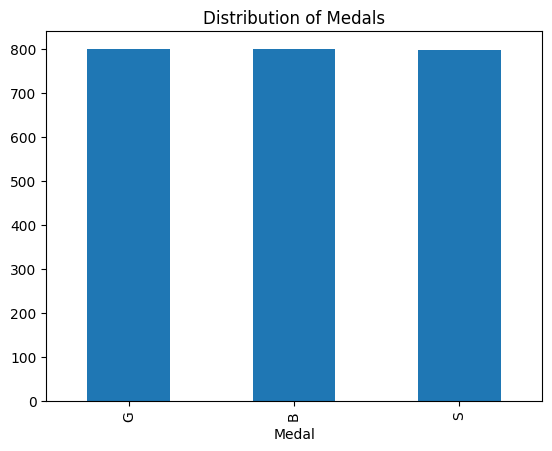

In [42]:
import matplotlib.pyplot as plt

# Example: Distribution of Medals
df['Medal'].value_counts().plot(kind='bar')
plt.title('Distribution of Medals')
plt.show()






# Answer Questions Using Pandas

What are the total number of medals awarded each year?

In [43]:
total_medals_by_year = df.groupby('Year')['Medal'].count()
print(total_medals_by_year)


Year
1896     37
1900     45
1904     51
1908     52
1912     63
1920     42
1924     66
1928     57
1932     84
1936     66
1948     63
1952     93
1956     58
1960     99
1964    102
1968     75
1972     81
1976     96
1980    111
1984     97
1988     18
1992    125
1996    130
2000    140
2004    136
2008    128
2012    138
2016    141
Name: Medal, dtype: int64


Who are the top 5 athletes with the most medals?

In [44]:
top_athletes = df['Name'].value_counts().head(5)
print(top_athletes)


Name
Merlene OTTEY         7
Paavo NURMI           7
Irena KIRSZENSTEIN    6
Tirunesh DIBABA       6
Usain BOLT            6
Name: count, dtype: int64


What is the distribution of medals by gender?

In [45]:
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)


Gender
M    1632
W     762
Name: count, dtype: int64


What is the medal count by nationality (top 5)?

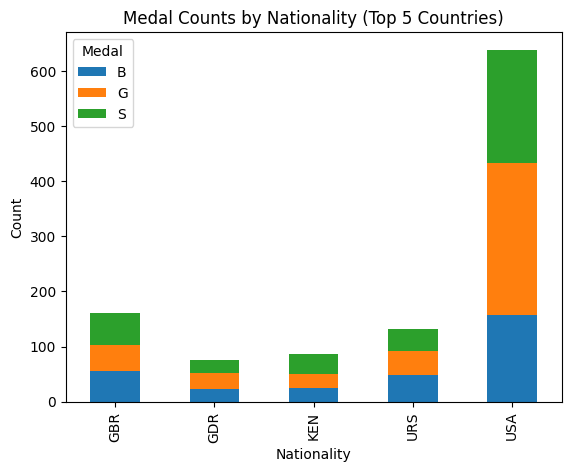

In [48]:

total_medals = df.groupby('Nationality')['Medal'].count()


top_countries = total_medals.nlargest(5).index

# Filter the DataFrame for the top 5 countries
df_top_countries = df[df['Nationality'].isin(top_countries)]

medal_counts_top = df_top_countries.groupby(['Nationality', 'Medal']).size().unstack().fillna(0)
medal_counts_top.plot(kind='bar', stacked=True)
plt.title('Medal Counts by Nationality (Top 5 Countries)')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()


Which location has hosted the most events?

In [52]:
events_by_location = df.groupby('Location')['Event'].nunique()
top_location = events_by_location.idxmax()
print(f"The location that hosted the most events is: {top_location}")


The location that hosted the most events is: Beijing


How have USA athletes progressed overtime in the 10k ?

/var/folders/8j/4z7rqf916pqd_r3vbh5hprrm0000gn/T/ipykernel_79371/748403854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_event_df['Result_timedelta'] = pd.to_timedelta('00:' + country_event_df['Result'])
/var/folders/8j/4z7rqf916pqd_r3vbh5hprrm0000gn/T/ipykernel_79371/748403854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_event_df['Result_seconds'] = country_event_df['Result_timedelta'].dt.total_seconds()


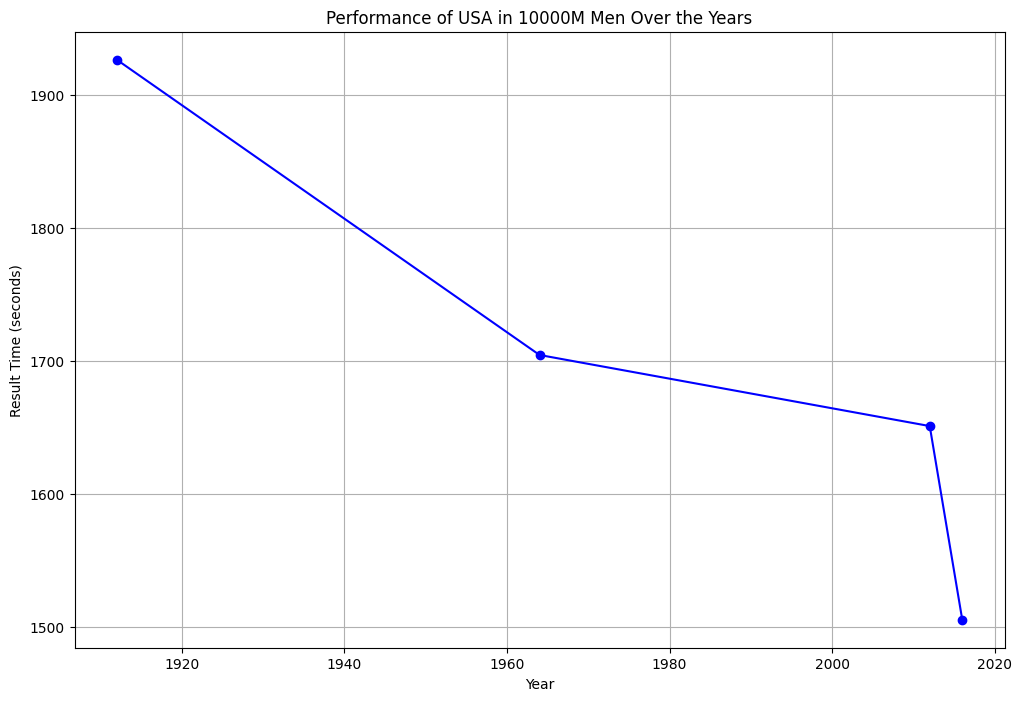

In [55]:

country_event_df = df[(df['Nationality'] == 'USA') & (df['Event'] == '10000M Men')]

country_event_df['Result_timedelta'] = pd.to_timedelta('00:' + country_event_df['Result'])

country_event_df['Result_seconds'] = country_event_df['Result_timedelta'].dt.total_seconds()

plt.figure(figsize=(12, 8))
plt.plot(country_event_df['Year'], country_event_df['Result_seconds'], marker='o', linestyle='-', color='blue')
plt.title('Performance of USA in 10000M Men Over the Years')
plt.xlabel('Year')
plt.ylabel('Result Time (seconds)')
plt.grid(True)
plt.show()


# Conclusion

The exploration of the Olympic dataset has showed compelling patterns and noteworthy achievements that span across decades of athletic history. Several key were found.

Firstly, there is an upward trajectory in the number of medals awarded each year. This steady increase reflects the ongoing growth and global significance of the Olympic Games, transcending borders and cultures.

At the top of individual accomplishments we find Usain Bolt, a name synonymous with speed and excellence. His remarkable collection of medals resonates as a testament to his contributions to the world of athletics, leaving an indelible mark on the Olympic stage.

An intriguing gender disparity was found in the dataset, with men consistently outpacing women in terms of medal awards. This maybe invites further exploration into the dynamics of gender representation within various Olympic events and the broader context of sports.

The USA emerges as a dominant force, consistently getting the highest medal count. Thier dominance reflects the nation's well rounded sports infrastructure, successful talent development programs, and a culture that creates athletic excellence.

Beijing is a recurring as a host city. The city's recurrent presence in the dataset shows its commitment and capability in orchestrating this grand sporting spectacle.

One of the most interesting analysis came from the significant improvement of USA's 10,000 meters performance between 2008 and 2016. This improvement signals advancements in training methodologies, athlete development, or other influential factors that have propelled the nation's athletes to new heights.

In conclusion, as a PSU student athlete studying this dataset was very enjoyable. Our analysis through this Olympic dataset has not only uncovered historical trends but also highlighted, the influence of host cities, and the ever-evolving landscape of sports. As we reflect on these insights, we gain a deeper appreciation for the nature of the Olympic Games and the legacy they leave on the world stage.